### QUEST
- apply() : '신장', '체중' -> BMI
- BMI 시각화 및 인사이트 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(4)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.2,4,Down,0


In [3]:
df_data = df_ROS[['환자ID','신장','체중']]
df_data

,환자ID,신장,체중
0,1PT,163,60.3
1,2PT,171,71.7
2,3PT,178,77.1
3,4PT,174,74.2
4,5PT,183,80.7
...,...,...,...
1889,1890PT,157,64.0
1890,1891PT,157,59.0
1891,1892PT,167,70.0
1892,1893PT,177,77.0


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   환자ID    1894 non-null   object 
 1   신장      1894 non-null   int64  
 2   체중      1894 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 44.5+ KB


In [5]:
def height(data_height) : 
    return data_height/100

In [ ]:
# def BMI(data_) : 
#     return data_height/100

In [6]:
df_data['height'] = df_data['신장'].apply(height)
df_data

C:\Users\01-10\AppData\Local\Temp\ipykernel_15684\2183418216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['height'] = df_data['신장'].apply(height)


,환자ID,신장,체중,height
0,1PT,163,60.3,1.63
1,2PT,171,71.7,1.71
2,3PT,178,77.1,1.78
3,4PT,174,74.2,1.74
4,5PT,183,80.7,1.83
...,...,...,...,...
1889,1890PT,157,64.0,1.57
1890,1891PT,157,59.0,1.57
1891,1892PT,167,70.0,1.67
1892,1893PT,177,77.0,1.77


In [12]:
# BMI = 체중(kg) / (키(m) * 키(m))

df_data.loc[:, 'BMI'] = df_data['체중']/(df_data['height']*df_data['height'])
df_data['BMI'] = df_data['BMI'].apply(int)
df_data

C:\Users\01-10\AppData\Local\Temp\ipykernel_15684\609639407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.loc[:, 'BMI'] = df_data['체중']/(df_data['height']*df_data['height'])
C:\Users\01-10\AppData\Local\Temp\ipykernel_15684\609639407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['BMI'] = df_data['BMI'].apply(int)


,환자ID,신장,체중,height,BMI
0,1PT,163,60.3,1.63,22
1,2PT,171,71.7,1.71,24
2,3PT,178,77.1,1.78,24
3,4PT,174,74.2,1.74,24
4,5PT,183,80.7,1.83,24
...,...,...,...,...,...
1889,1890PT,157,64.0,1.57,25
1890,1891PT,157,59.0,1.57,23
1891,1892PT,167,70.0,1.67,25
1892,1893PT,177,77.0,1.77,24


In [16]:
df_data.describe()

,신장,체중,height,BMI
count,1894.000000,1894.000000,1894.000000,1894.000000
mean,168.027983,68.111140,1.680280,23.546463
std,9.211419,11.234318,0.092114,2.845875
min,140.000000,35.000000,1.400000,14.000000
25%,161.000000,59.700000,1.610000,22.000000
50%,169.000000,68.000000,1.690000,24.000000
75%,175.000000,75.000000,1.750000,24.000000
max,204.000000,136.100000,2.040000,48.000000


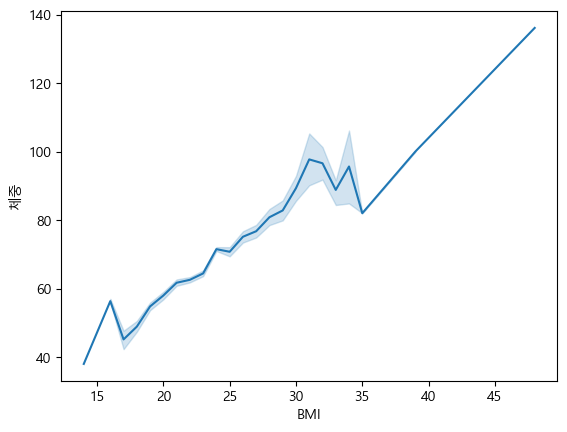

In [28]:
sns.lineplot(data=df_data, x='BMI', y='체중')
plt.xlabel('BMI')
plt.ylabel('체중')
plt.show()

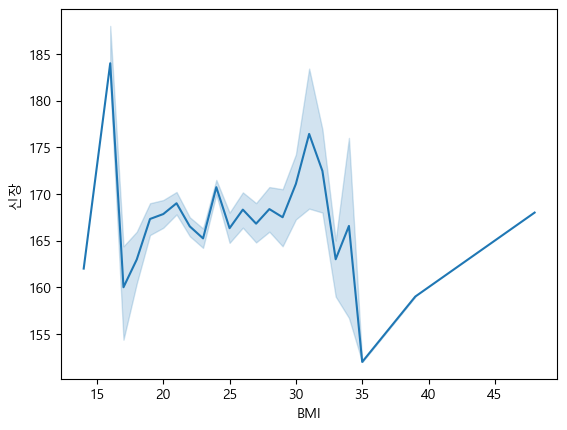

In [29]:
sns.lineplot(data=df_data, x='BMI', y='신장')
plt.xlabel('BMI')
plt.ylabel('신장')
plt.show()

In [30]:
df_data.corr()

C:\Users\01-10\AppData\Local\Temp\ipykernel_15684\3492733786.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.corr()


,신장,체중,height,BMI
신장,1.000000,0.703038,1.000000,0.057533
체중,0.703038,1.000000,0.703038,0.743209
height,1.000000,0.703038,1.000000,0.057533
BMI,0.057533,0.743209,0.057533,1.000000


In [ ]:
- BMI는 신장보다는 체중이 더 관계가 있다.